# Predikcia časových radov

<object data="https://miroslava.matejova.website.tuke.sk/IE/IE/cvicenie4.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="https://miroslava.matejova.website.tuke.sk/IE/IE/cvicenie4.pdf">
        <p> Cvičenie v PDF dostupné: <a href="https://miroslava.matejova.website.tuke.sk/IE/IE/cvicenie4.pdf">TU!</a></p>
    </embed>
</object>

Najprv si nainštalujeme balík dynlm a načítame si dátovú množinu USMacroG, ktorá
obsahuje viacero časových radov makroekonomických ukazovateľov USA.

In [1]:
install.packages("dynlm")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages("AER", repos='http://cran.us.r-project.org')  # after restart kernel

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library("dynlm")

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
data("USMacroG", package="AER")

In [3]:
summary(USMacroG)

      gdp        consumption       invest         government          dpi      
 Min.   :1610   Min.   :1059   Min.   : 197.7   Min.   : 359.6   Min.   :1178  
 1st Qu.:2602   1st Qu.:1640   1st Qu.: 309.3   1st Qu.: 740.6   1st Qu.:1822  
 Median :4142   Median :2715   Median : 568.5   Median : 952.0   Median :3133  
 Mean   :4563   Mean   :2999   Mean   : 652.3   Mean   : 997.0   Mean   :3341  
 3rd Qu.:6294   3rd Qu.:4235   3rd Qu.: 874.1   3rd Qu.:1300.8   3rd Qu.:4733  
 Max.   :9304   Max.   :6341   Max.   :1801.6   Max.   :1582.8   Max.   :6635  
                                                                               
      cpi               m1             tbill            unemp       
 Min.   : 70.60   Min.   : 110.2   Min.   : 0.810   Min.   : 2.600  
 1st Qu.: 91.15   1st Qu.: 147.5   1st Qu.: 3.087   1st Qu.: 4.400  
 Median :162.10   Median : 284.4   Median : 5.045   Median : 5.600  
 Mean   :225.82   Mean   : 453.9   Mean   : 5.229   Mean   : 5.675  
 3rd Qu.:350.12

Zobrazíme si v jednom grafe priebehy príjmov dpi a spotreby consumption:

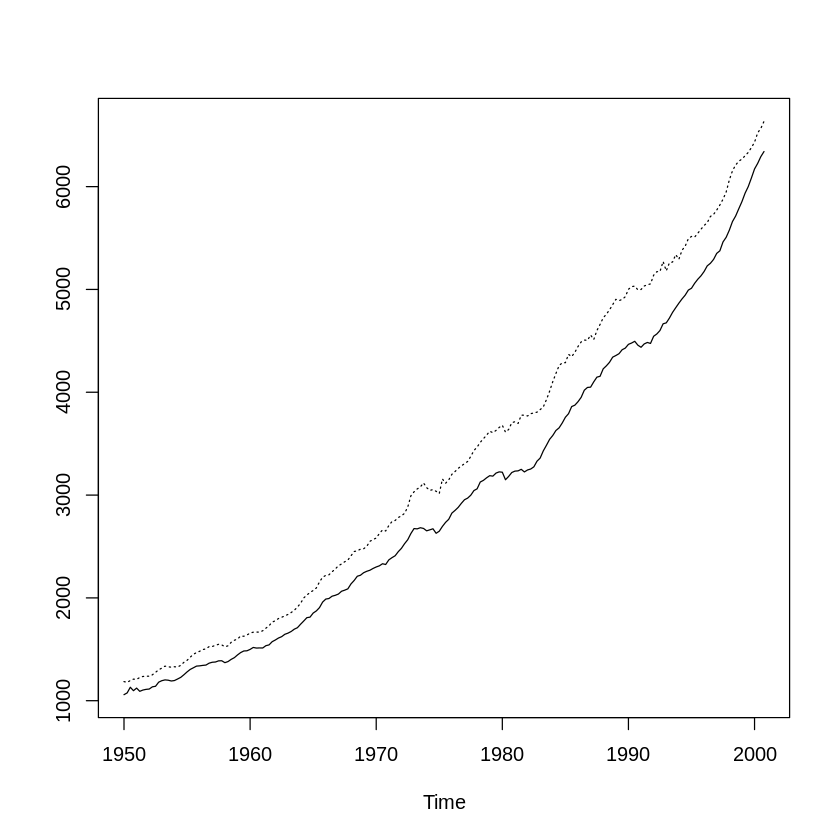

In [14]:
ts.plot(USMacroG[, c("dpi", "consumption")], lty=c(3,1))


Aby sme zistili či je vhodné modelovať časový rad lineárnym modelom, môžeme si vypočítať
autokorelačné koeficienty, tzn. koreláciu medzi hodnotami $y_t$ a $y_{t-1}$, $y_t$ a $y_{t-2}$ atď. Pre
výpočet a zobrazenie môžeme použiť funkciu `acf`, napr. zobrazíme autokorelačné koeficienty
pre časový rad `dpi` s maximálnym oneskorením 4:


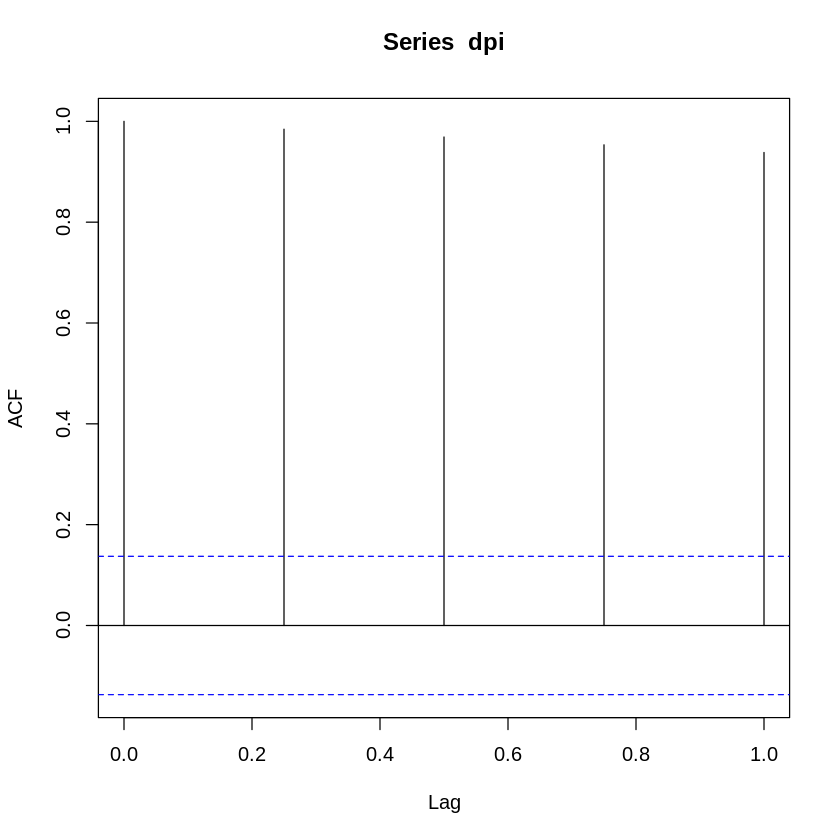

In [5]:
dpi = USMacroG[,"dpi"]
autocorr = acf(dpi, lag.max=4)

Môžeme si zobraziť aj závislosť medzi $y$ a $y_{t-k}$ kde k je oneskorenie, napr. ak si chceme
zobraziť závislosť medzi $y_t$ a $y_{t-1}$, najprv si prevedieme časovú postupnosť na vektor
funkciou `as.numeric` a potom si vyberieme prvky od `[1:N-1]` a `[2:N]` kde `N` je dĺžka vektora
(počet hodnôt v časovom rade):

[1] 0.9998206

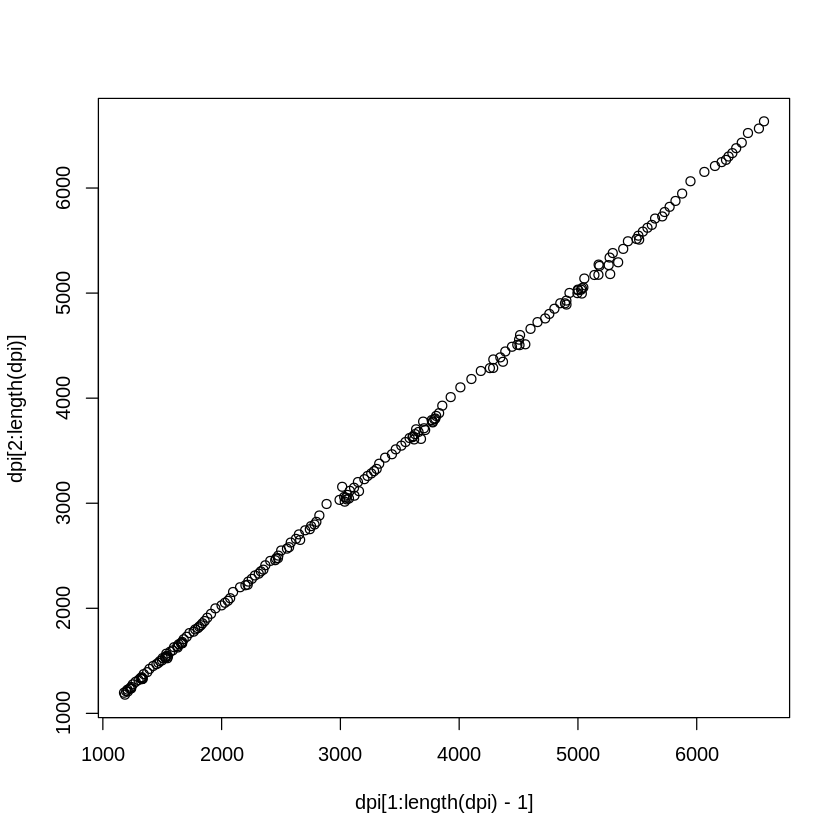

In [6]:
dpi = as.numeric(dpi)
plot(dpi[1:length(dpi)-1], dpi[2:length(dpi)])
cor(dpi[1:length(dpi)-1], dpi[2:length(dpi)])

Ak porovnáme hodnotu korelácie z posledného výpisu s výstupom autokorelačnej funkcie
acf pre oneskorenie 1 (`autocorr[1]`) zistíme, že sa odlišujú pričom by malo ísť o koreláciu
medzi rovnakými hodnotami. Rozdiel je spôsobený odlišnou normalizáciou pri výpočte
korelačného koeficientu, `acf` hodnota je normovaná `1/N` a cor `1/(N-1)`.

Vytvoríme model ktorý bude predikovať spotrebu v čase `t` na základe aktuálnej hodnoty
príjmov `dpi` a predchádzajúcej spotreby v čase `t-1`:

In [7]:
cons_lm1 <- dynlm(consumption ~ dpi + L(consumption), data=USMacroG)

Výsledný objekt je podobného typu ako pri lineárnej regresii, tzn. funkcia `summary` napr.
zobrazí hodnoty vypočítaných koeficientov a ich významnosť pre predikciu a základné
štatistiky o rezíduách. Podobne môžete vypočítať kvadratickú chybu na trénovacích dátach
funkciou `deviance`.

In [8]:
summary(cons_lm1)


Time series regression with "ts" data:
Start = 1950(2), End = 2000(4)

Call:
dynlm(formula = consumption ~ dpi + L(consumption), data = USMacroG)

Residuals:
     Min       1Q   Median       3Q      Max 
-101.303   -9.674    1.141   12.691   45.322 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.535216   3.845170   0.139    0.889    
dpi            -0.004064   0.016626  -0.244    0.807    
L(consumption)  1.013111   0.018161  55.785   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.52 on 200 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 4.627e+05 on 2 and 200 DF,  p-value: < 2.2e-16


In [9]:
deviance(cons_lm1)

[1] 92644.15

Predikované hodnoty pre celý časový rad si môžeme vypočítať funkciou `fitted`:

In [10]:
fitted(cons_lm1)

,Qtr1,Qtr2,Qtr3,Qtr4
1950,,1068.530,1085.678,1141.446
1951,1107.616,1133.074,1101.222,1113.875
1952,1120.561,1123.647,1145.331,1150.601
1953,1191.158,1205.670,1213.395,1210.677
1954,1202.554,1207.021,1222.253,1238.343
1955,1263.898,1291.634,1316.038,1332.179
1956,1348.742,1351.206,1355.739,1358.789
1957,1377.527,1386.499,1388.788,1400.158
1958,1401.347,1382.363,1393.167,1414.766
1959,1431.436,1458.060,1481.372,1497.127


Aby sme vyhodnotili presnosť a kvalitu modelu, môžeme si zobraziť časový priebeh a
predikované hodnoty v jednom grafe. Tak isto je užitočné si zobraziť v čase aj hodnoty
rezíduí, ktoré sa dajú vypočítať funkciou `residuals`:

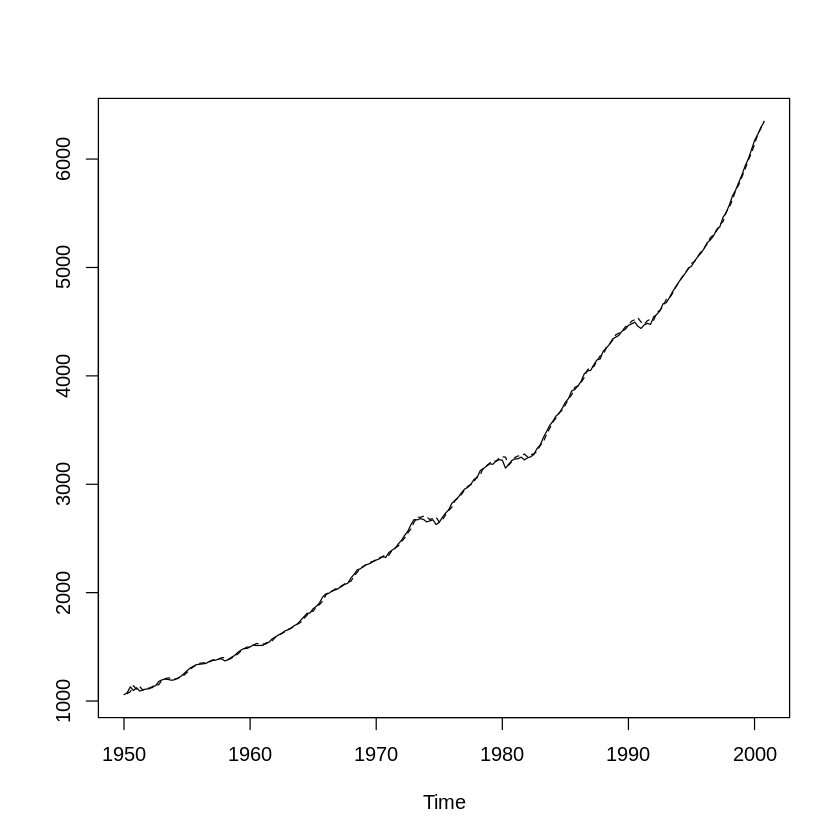

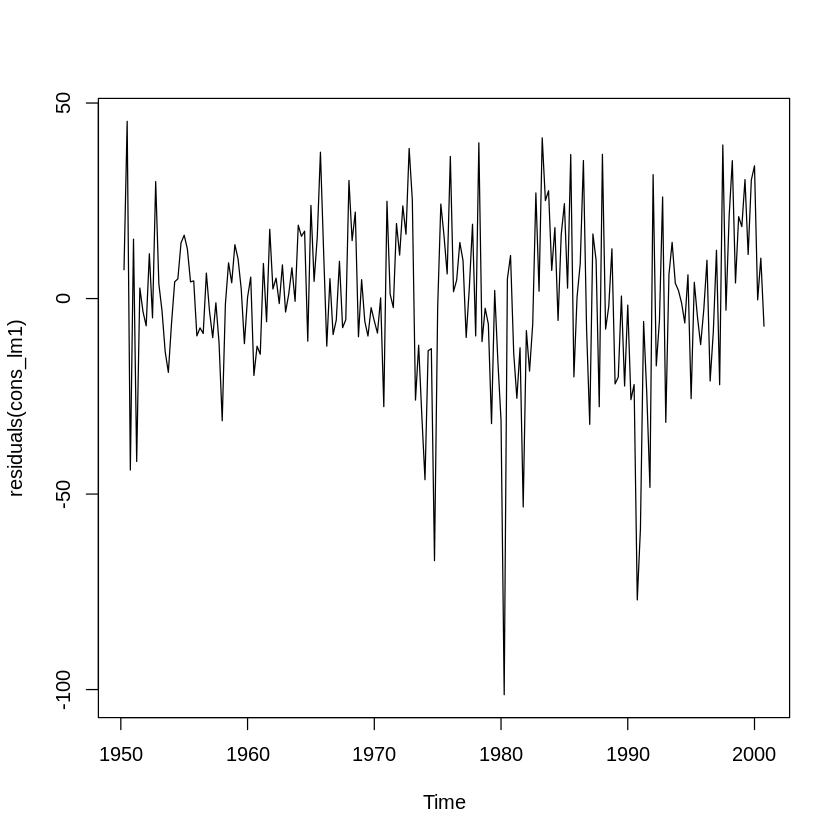

In [11]:
ts.plot(USMacroG[,"consumption"], fitted(cons_lm1),
lty=c(1:2))
ts.plot(residuals(cons_lm1))

# Úlohy na cvičení

1. Načítajte dáta `USMacroG`. Pre časový rad consumption vypočítajte a zobrazte
pomocou funkcie `acf` autokorelačné koeficienty až do oneskorenia 10.

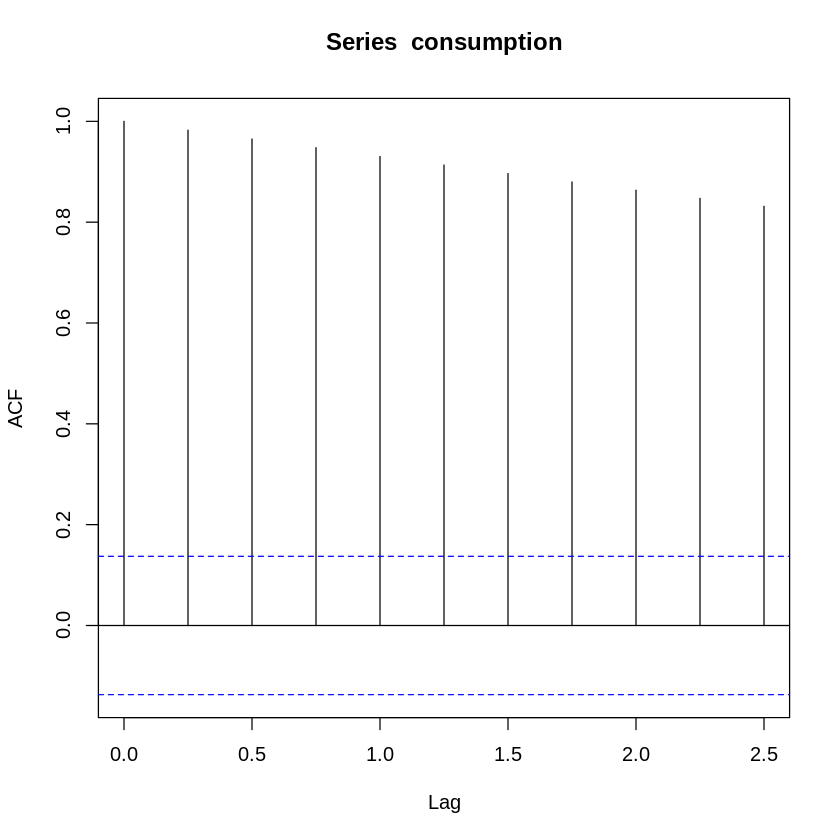

In [18]:
consumption = USMacroG[,"consumption"]
autocorr = acf(consumption, lag.max=10)

2. Pre časový rad consumption si vytvorte dátovú množinu zloženú z oneskorených
atribútoch v čase `t`, `t-1`, `t-2`, `t-3`, `t-4` a `t-5`. Pomocou funkcie `cor` vypočítajte korelačnú
maticu pre všetky atribúty. Zistite s ktorým atribútom je najviac korelovaný atribút `t-2`, `t-3` a `t-4`, a zobrazte závislosti medzi `t-2`, `t-3` a `t-4` a najviac korelovanými atribútmi.

,t,t_1,t_2,t_3,t_4,t_5
t,1.0000000,0.9998932,0.9997348,0.9995143,0.9992277,0.9989238
t_1,0.9998932,1.0000000,0.9998911,0.9997291,0.9995052,0.9992154
t_2,0.9997348,0.9998911,1.0000000,0.9998870,0.9997244,0.9994992
t_3,0.9995143,0.9997291,0.9998870,1.0000000,0.9998822,0.9997176
t_4,0.9992277,0.9995052,0.9997244,0.9998822,1.0000000,0.9998817
t_5,0.9989238,0.9992154,0.9994992,0.9997176,0.9998817,1.0000000


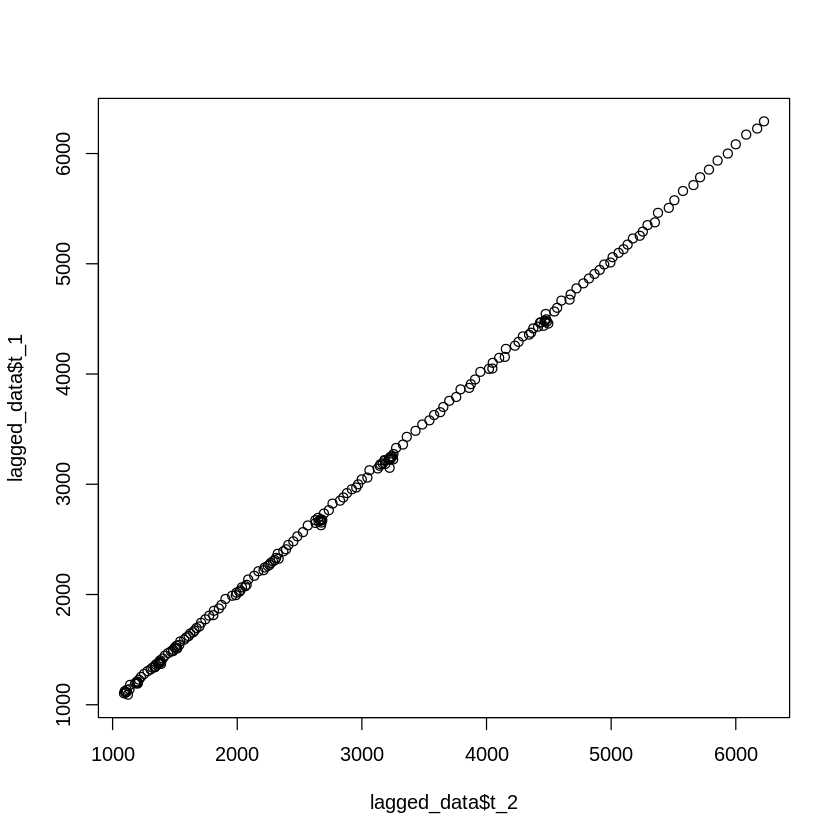

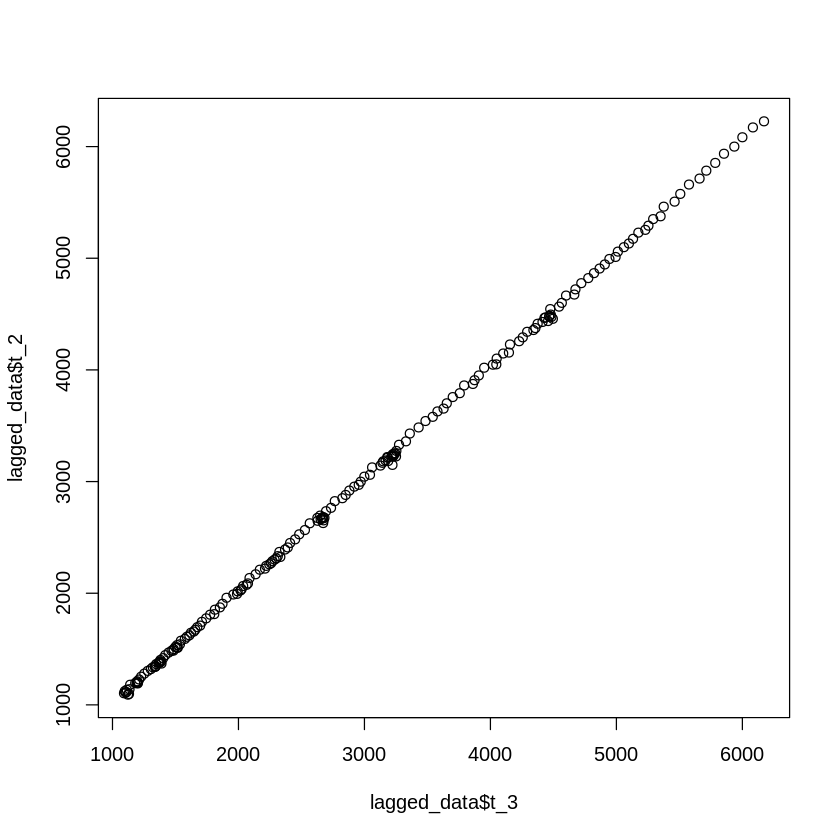

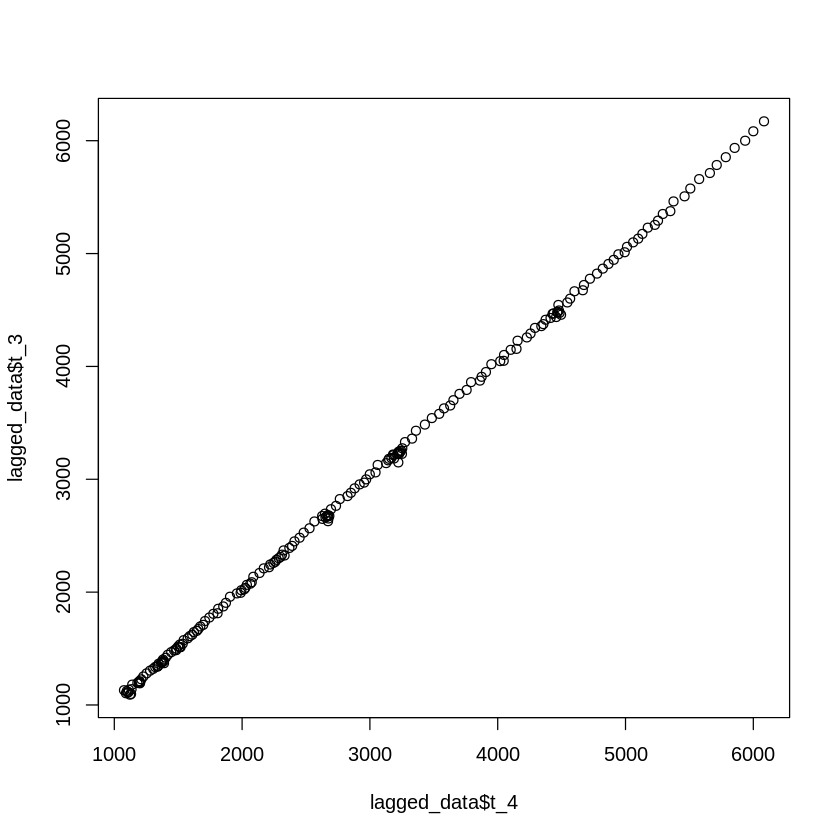

In [32]:
lagged_data <- as.data.frame(embed(consumption, 6))
colnames(lagged_data) <- c("t", "t_1", "t_2", "t_3", "t_4", "t_5")
cor = round(cor(lagged_data),7)
cor
plot(lagged_data$t_2,lagged_data$t_1)
plot(lagged_data$t_3,lagged_data$t_2)
plot(lagged_data$t_4,lagged_data$t_3)

3. Pomocou funkcie cor vypočítajte korelačný koeficient medzi hodnotami časového
radu `consumtion` a všetkými ostatnými ukazovateľmi v dátovej množine `USMacroG`.
Vyberte dva ukazovatele, ktoré sú s `consumption` najviac korelované. Vytvorte
prediktívny model, ktorý predikuje $consumption_t$ na základe týchto dvoch atribútov
oneskorených o `t-1`.

In [4]:
library("dynlm")
data("USMacroG", package="AER")
USMacroG[is.na(USMacroG)] = 0

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [5]:
consumption = USMacroG[,"consumption"]
gdp = USMacroG[,"gdp"]
dpi = USMacroG[,"dpi"]
cor(USMacroG, consumption)
cons_lm1 <- dynlm(consumption ~ L(gdp) + L(dpi))

gdp,0.99964673
consumption,1.00000000
invest,0.97376619
government,0.97787022
dpi,0.99822249
cpi,0.97939881
m1,0.96406199
tbill,0.40581187
unemp,0.23405017
population,0.97985480
inflation,0.08034695


4. Zobrazte priebeh radu `consumption` a predikcie modelu z predchádzajúceho príkladu.
Vypočítajte rezíduá a zobrazte priebeh rezíduí.

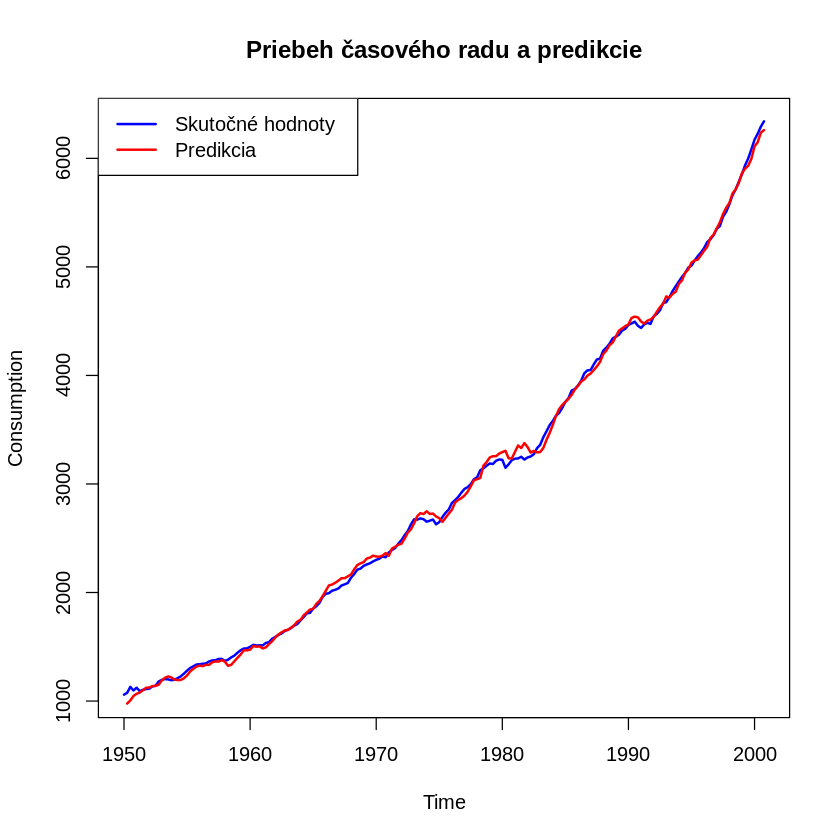

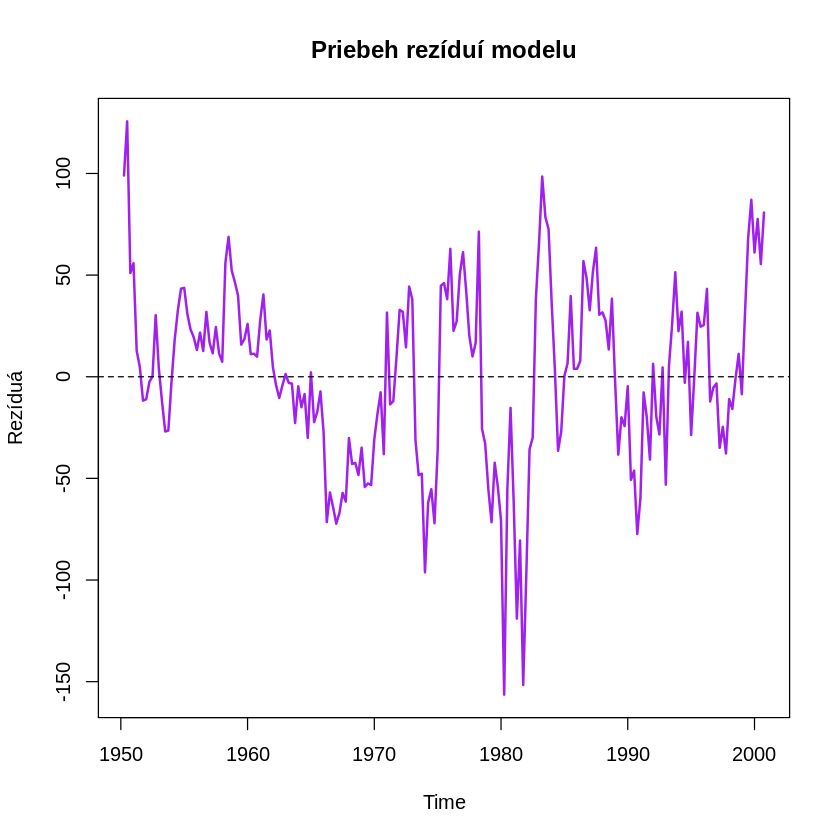

In [9]:
predicted_values <- fitted(cons_lm1)
residuals <- residuals(cons_lm1)

plot(consumption, type = "l", col = "blue", lwd = 2, 
     ylab = "Consumption", main = "Priebeh časového radu a predikcie")
lines(predicted_values, col = "red", lwd = 2)
legend("topleft", legend = c("Skutočné hodnoty", "Predikcia"), 
       col = c("blue", "red"), lwd = 2)

# Vykreslite priebeh rezíduí
plot(residuals, type = "l", col = "purple", lwd = 2, 
     ylab = "Rezíduá", main = "Priebeh rezíduí modelu")
abline(h = 0, col = "black", lty = 2)

5. Vytvorte autokorelačné prediktívne modely  

    $consumption_t = \beta_0 + \beta_1 dpi_t + \beta_2 dpi_{t-1}$ 

    a

    $consumption_t = \beta_0 + \beta_1 dpi_t + \beta_2 dpi_{t-1} + \beta_3 consumption_{t-1}$ 

    a 

    $consumption_t = \beta_{0} + \beta_1 dpi_t + \beta_2 consumption_{t-1}$. 

    Na jednom grafe zobrazte priebeh časového radu consumption a predikcie všetkých troch modelov.

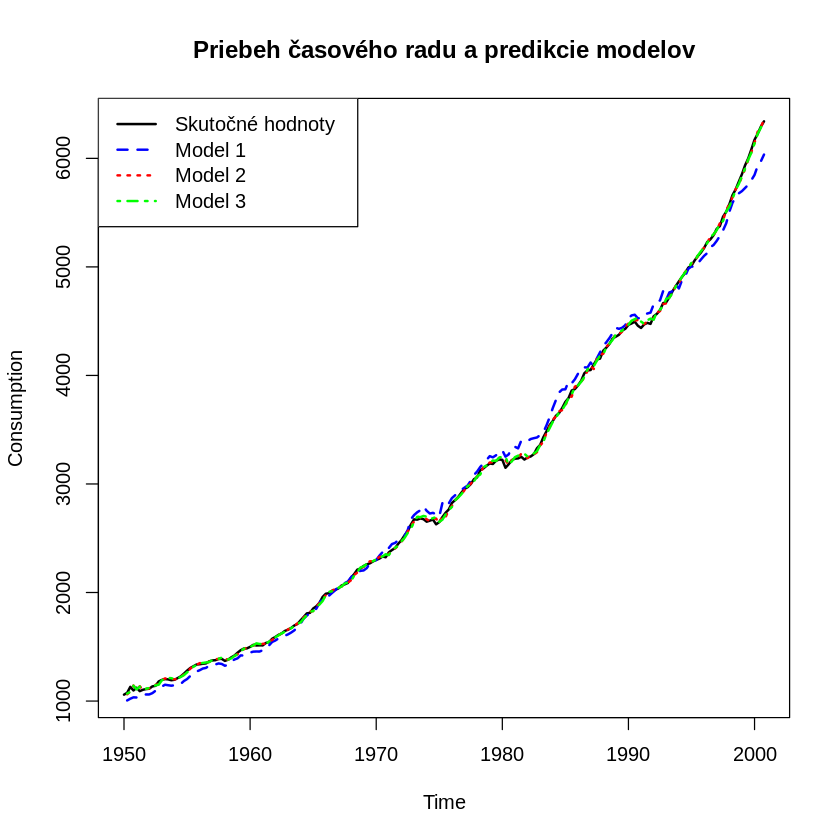

In [10]:
# Model 1: consumption_t = β0 + β1 * dpi_t + β2 * dpi_t-1
model1 <- dynlm(consumption ~ dpi + L(dpi))

# Model 2: consumption_t = β0 + β1 * dpi_t + β2 * dpi_t-1 + β3 * consumption_t-1
model2 <- dynlm(consumption ~ dpi + L(dpi) + L(consumption))

# Model 3: consumption_t = β0 + β1 * dpi_t + β2 * consumption_t-1
model3 <- dynlm(consumption ~ dpi + L(consumption))

# Predikujte hodnoty pre každý model
pred1 <- fitted(model1)
pred2 <- fitted(model2)
pred3 <- fitted(model3)

# Vykreslite priebeh časového radu a predikcie
plot(consumption, type = "l", col = "black", lwd = 2, 
     ylab = "Consumption", main = "Priebeh časového radu a predikcie modelov")
lines(pred1, col = "blue", lwd = 2, lty = 2)
lines(pred2, col = "red", lwd = 2, lty = 3)
lines(pred3, col = "green", lwd = 2, lty = 4)

# Pridajte legendu
legend("topleft", legend = c("Skutočné hodnoty", "Model 1", "Model 2", "Model 3"), 
       col = c("black", "blue", "red", "green"), lty = c(1, 2, 3, 4), lwd = 2)

6. Vyhodnoťte presnosť modelov pomocou funkcie `deviance`. Zistite, ktorý model je
najlepší a zistite, ktorý vstupný atribút je najdôležitejší pre tento model. Zobrazte X-Y
závislosť medzi `consumption` a najdôležitejším atribútom.

[1] 1534001

[1] 73550.21

[1] 92644.15

dpi     L(dpi) 
0.89116834 0.03091344

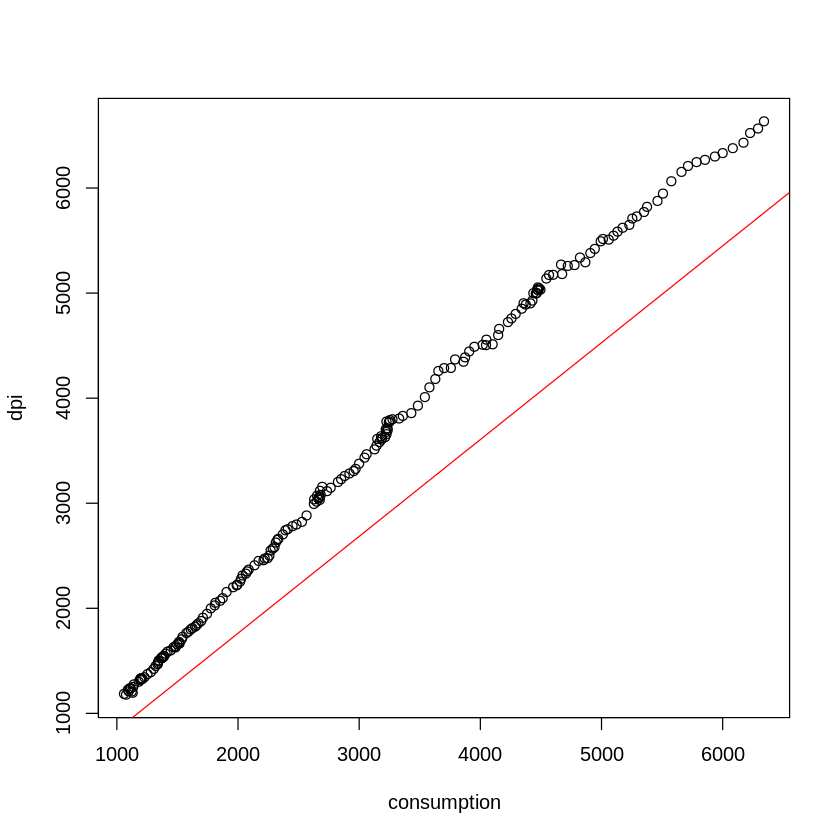

In [21]:
deviance(model1)
deviance(model2)
deviance(model3)
coef(model1)[-1]
plot(consumption, dpi)
    abline(dynlm(consumption ~ dpi), col = "red")

7. Zobrazte časový priebeh rezíduí a histogram rezíduí pre model $consumption_t = \beta_0 +
\beta_1 dpi_t + \beta_2 dpi_{t-1} + \beta_3 consumption_{t-1}.$

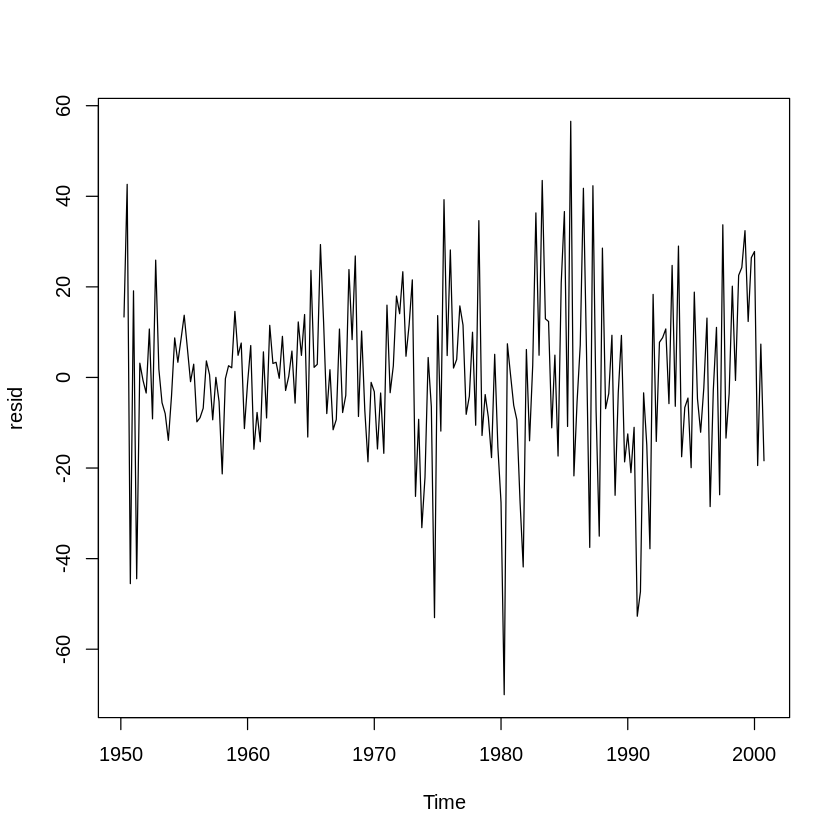

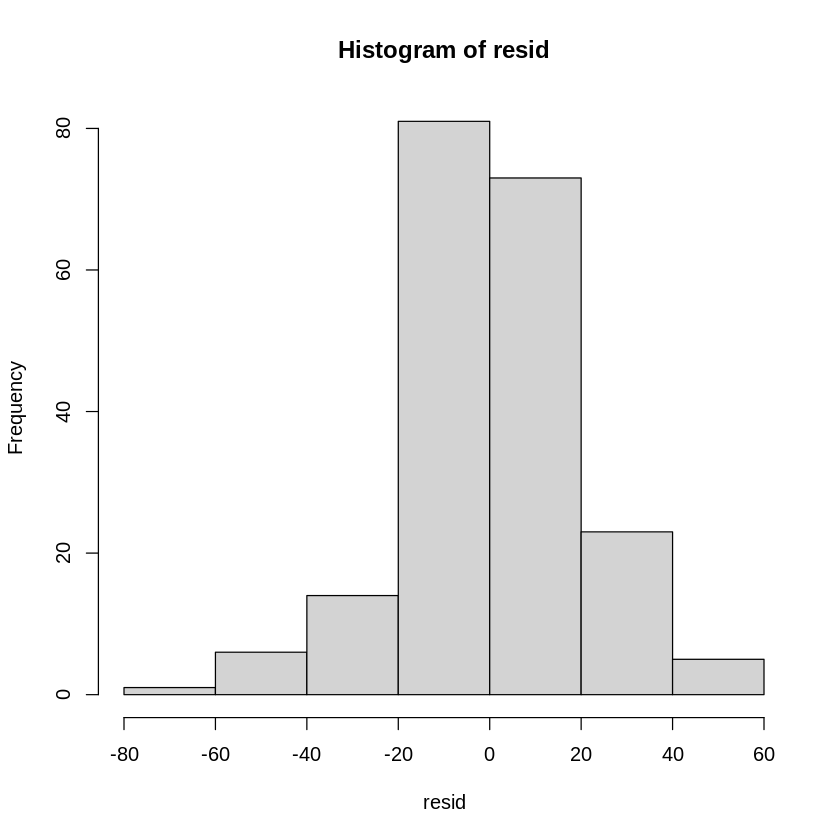

In [14]:
model4 = dynlm(consumption ~ dpi + L(dpi) + L(consumption))
resid = residuals (model4)
plot(resid)
hist(resid)

8. Načítajte dáta `AirPassengers`. Pomocou funkcie acf zobrazte autokorelačný graf.
    Všimnite si ako sa mení hodnota autokorelačných koeficientov pri časových radoch s
    cyklickou zložkou. Vytvorte autoregresný model 

    $y_t = \beta_0 + \beta_1(y_{t−1} − y_{t−2}) + \beta_2 y_{t−4}$. 

    Dekomponujte časový priebeh AirPassengers na aditívne zložky pomocou funkcie `dec = decompose(AirPassengers)`. Vyberte z priebehu iba zložku trendu `dec$trend` a vytvorte autoregresný model 

    $y_t = \beta_0 + \beta_1(y_{t−1} − y_{t−2}) + \beta_2 y_{t−4} $
   
    pre časový priebeh trendu. Vypočítajte predikciu modelu funkciou `fitted` a pripočítajte k
    nej sezónnu zložku `dec$seasonal`. Výsledný časový rad zobrazte v jednom grafe spolu
    s priebehom `AirPassengers` a predikciou predchádzajúceho modelu